<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [110]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import zipfile

**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

In [111]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data downloaden</h3>

In [112]:
# dataUrl = requests.get("http://madm.dfki.de/files/sentinel/EuroSAT.zip")
# dataFile = zipfile.ZipFile(io.BytesIO(dataUrl.content))

In [114]:
# get file names
riverDirectory = 'Appels/Normal_Apple'
edgeFiles = list()
 
for filename in os.listdir(riverDirectory):
    imgFile = os.path.join(riverDirectory, filename)
    edgeFiles.append(imgFile)
    

# txtFiles = list()

# for txtFile in dataFile.namelist():
#     txtFiles.append(txtFile)
#     # print(txtFile)

edgeFiles = [img for img in edgeFiles if ".jpg" in img]

print("Edgefiles ", edgeFiles)    


imageObjects = np.zeros([len(edgeFiles), 64, 64, 3])
# print(imageObjects)



i = 0

for pic in edgeFiles:
    imageObjects[i] = np.asarray(Image.open(pic)).astype('uint8')/255
    i += 1
    
print(imageObjects[0])    

Edgefiles  ['Appels/Normal_Apple\\1.jpg', 'Appels/Normal_Apple\\AnyConv.com__download (1).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (10).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (11).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (12).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (13).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (14).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (15).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (16).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (17).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (18).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (19).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (2)(1).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (2)(2).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (2)(3).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (2).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (20).jpg', 'Appels/Normal_Apple\\AnyConv.com__download (5).jpg', 'Appels/Normal_Apple

ValueError: could not broadcast input array from shape (142,154,3) into shape (64,64,3)

<h3>Data filteren</h3>

In [ ]:
edgeFiles = [x for x in edgeFiles if ".jpg" in x]

<h3>Data inlezen</h3>

**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [ ]:
# imageLabels = np.empty(len(txtFiles), dtype = 'S20')

# i = 0

# for label in txtFiles:
#     txtFiles[i] = label.split('/')[1]
#     i += 1
    
# print(txtFiles[1])    



imageLabels = np.empty(len(edgeFiles), dtype = 'S20')

i = 0

# for label in edgeFiles:
#     print(label)
#     edgeFiles[i] = label.replace("\\","/").split('/')[2]
#     i += 1

    

    

labelNames, labelNumbers = np.unique(edgeFiles, return_inverse=True)
# print(labelNames)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
# print(labelNames)

#print("labelNumbers", labelNumbers)
#print("LabelNumbers Length", len(labelNumbers))


#print("imageObjects", len(imageObjects))

np.array(np.unique(labelNumbers, return_counts=True)).T

In [ ]:
# change them to integers in alphabetical order
# labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
# labelDict = dict(zip(np.unique(labelNumbers), labelNames))
# print(labelNames)
# print(labelNumbers)

# np.array(np.unique(labelNumbers, return_counts=True)).T

<h3>Data splitten</h3>

In [ ]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.5, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)

print (len(trainSet), len(testSet),len(trainLabels), len(testLabels))

<h3>Data inspecteren</h3>

In [115]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

NameError: name 'trainSet' is not defined

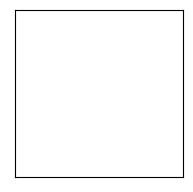

In [116]:
inspectData()    

<h2>Maak een model</h2>

<h3>Definieer de netwerktopologie</h3>

<h3>Exercise 1</h3>
<p>
    Vul de netwerktopologie tot een bruikbaar Neural Netwerk onstaat.
</p>

In [ ]:
model =  keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))







<h3>Definieer de trainparameters</h3>

In [ ]:
lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 5

<h3>Train het model</h3>

In [ ]:
print(len(imageObjects))
print(len(trainLabels))
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history = model.fit(trainSet, trainLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)


<h3>Test het model</h3>

<h3>Exercise 2</h3>
<p>
    Test het Neural Netwerk met de testset en laat zien of het in staat is de juiste class te vinden.
</p>

In [ ]:
history_test = model.fit(testSet, testLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)


In [ ]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history_test.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testSet,  testLabels, verbose=2)

example_batch = trainSet[:10]
example_result = model.predict(example_batch)
example_result




In [ ]:
pred = model.predict(testSet, batch_size=16)
pred = np.argmax(pred, axis=-1)
print(pred)

labels = np.argmax(testLabels,axis=-1)
print(labels)
conf_matrix = tf.math.confusion_matrix(labels=testLabels, predictions=pred)

print(conf_matrix)

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = testLabels
confusion_matrix = metrics.confusion_matrix(actual, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.show()
